In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates

%matplotlib notebook

In [2]:
# Load HDF file

df1 = pd.HDFStore('../Data/analysis_T6_5IL.h5')['df']
df2 = pd.HDFStore('../Data/analysis_T6_10IL.h5')['df']
df3 = pd.HDFStore('../Data/analysis_T6_20IL.h5')['df']
df4 = pd.HDFStore('../Data/analysis_T6_2p5IL.h5')['df']

# df.info()

<IPython.core.display.Javascript object>


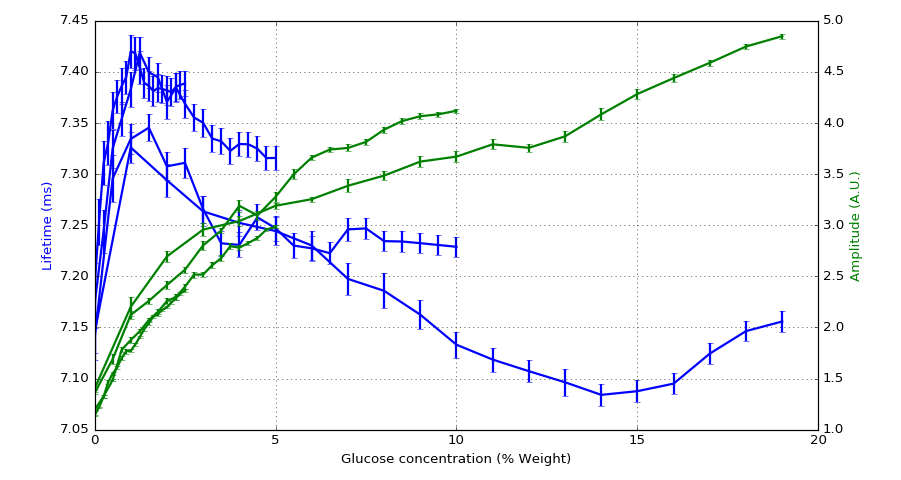

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for df in [df1, df2, df3, df4]:
    # Create column for time since start of measurement
    df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

    # Drop first 600 sweeps (300 sweeps = 1 min @ 5HZ capture rate)
    df = df[df.sweep_no > 900]
    # df = df[df.sweep_no < 900]
    
    grouped = df.groupby(['concentration'])
    mean = grouped.mean()
    stdd = grouped.std()

    mean = mean.reset_index()
    stdd = stdd.reset_index()

    ax1.errorbar(mean['concentration'], mean['tau'], yerr=stdd['tau'], color='b', lw='2')
    ax2.errorbar(mean['concentration'], mean['A'], yerr=stdd['A'], color='g', lw='2')

ax1.set_xlabel('Glucose concentration (% Weight)')
ax1.set_ylabel('Lifetime (ms)', color='b')
ax2.set_ylabel('Amplitude (A.U.)', color='g')

ax1.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')

plt.tight_layout()
# plt.legend()
# plt.legend()
# plt.title(df['chip'][0])
# plt.savefig("../Data/Plots/together_T6" + '.png', dpi=600)